# Data Mining (Δ02): Exercise Set 2: 2.2 - 3Rings Dataset 

<br>Name: Nefeli Eleftheria Sextou</br> 
<br> Student ID: 503</br> 
<br> E-mail: pcs00503@uoi.gr, nsekstou@cs.uoi.gr</br>

In [1]:
#general
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#data preprocessing


#classifiers
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
#from scipy.cluster.hierarchy import dendrogram, linkage

#to ignore warnings 
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
data = []
# read the file line by line
with open(r'C:\Users\Nefeli\Desktop\dm_msc\DM_Homework2_2024\clustering\3rings.txt', 'r') as file:
    for line in file:
        # Strip whitespace, split (by space)
        clean_line = line.strip().split()
        data.append((float(clean_line[0]), float(clean_line[1])))

# Create DataFrame from the list
main_df = pd.DataFrame(data, columns=['x', 'y'])
#rings3

### Plot data

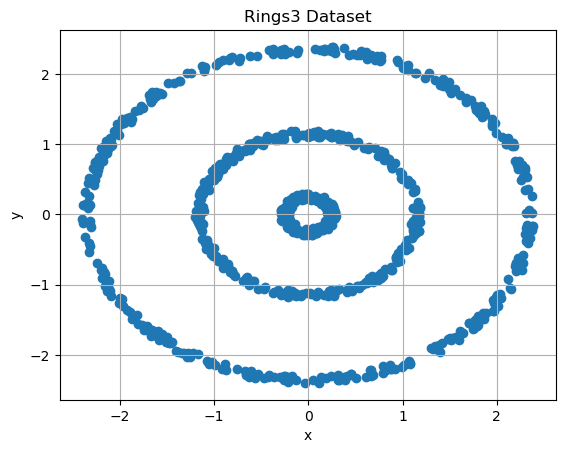

In [3]:
plt.scatter(main_df['x'], main_df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Rings3 Dataset')
plt.grid(True)
plt.show()

<b>Expected number of clusters: 3</b>

## k-means

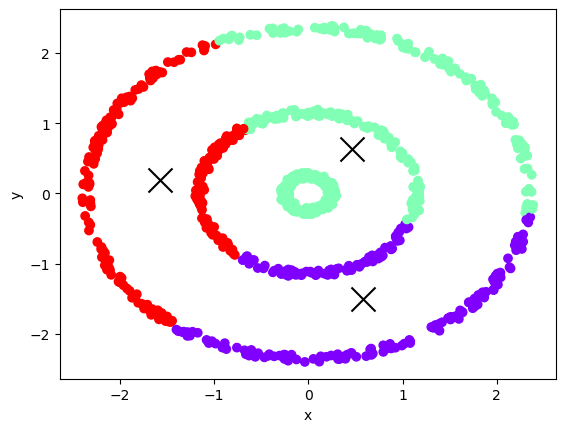

In [4]:
#init and fit
kmeans = KMeans(n_clusters=3)
kmeans.fit(main_df)

# get centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

plt.scatter(main_df['x'], main_df['y'], c=labels, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Agglomerative Clustering : single link

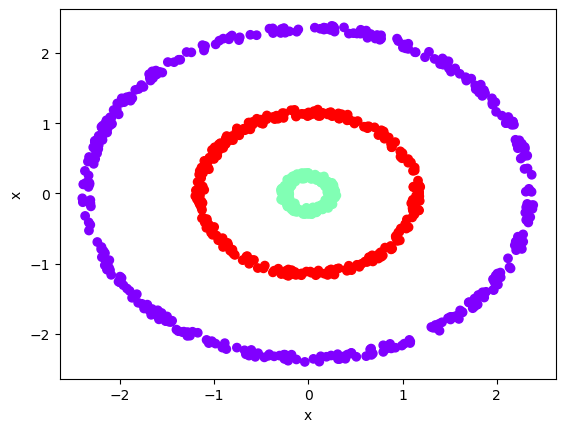

In [5]:
#init and fit
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='single')

#get labels
labels = agg_cluster.fit_predict(main_df)

plt.scatter(main_df['x'], main_df['y'], c=labels, cmap='rainbow')
plt.xlabel('x')
plt.ylabel('x')
plt.show()


## Agglomerative Clustering : average link

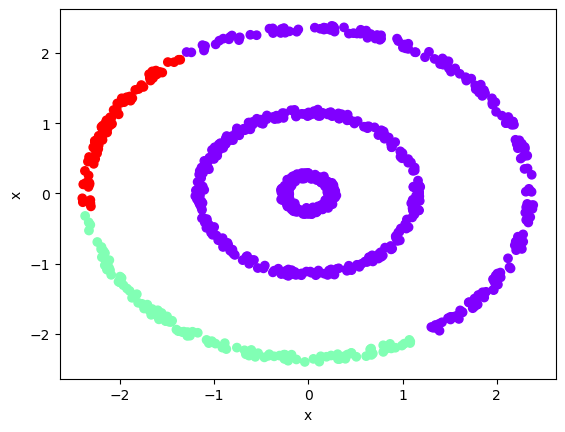

In [6]:
#init and fit
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='average')

#get labels
labels = agg_cluster.fit_predict(main_df)

plt.scatter(main_df['x'], main_df['y'], c=labels, cmap='rainbow')
plt.xlabel('x')
plt.ylabel('x')
plt.show()

## Spectral Clustering 

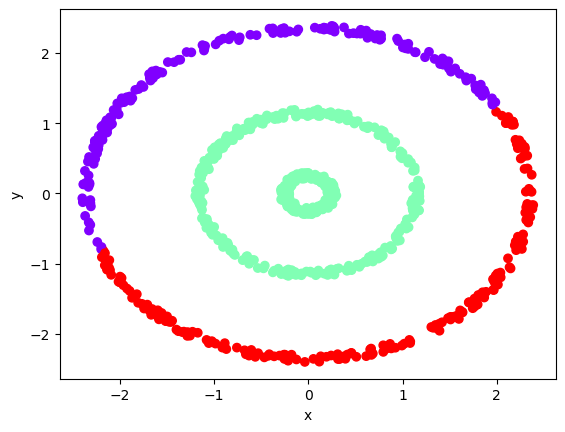

In [7]:
# Perform spectral clustering
sigma =0.5  # tried 0.1, 0.5, 1
spectral_cluster = SpectralClustering(n_clusters=3, affinity='rbf', gamma = (1/(sigma**2)), assign_labels='kmeans')
labels = spectral_cluster.fit_predict(main_df)

plt.scatter(main_df['x'], main_df['y'], c=labels, cmap='rainbow')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Remarks 

Spectral Clustering, K - Means and Agglomerative clustering with the average link setting fail to cluster the data as anticipated. On the other hand, Agglomerative Clustering with the single link setting succeeds in doing so.

Spectral Clustering is unable to capture the similarity between points in different rings in its similarity matrix.

K-Means fails because it cannot handle ring-shaped structures like the given dataset since it tends to be problematic when applied to data that is non-spherical, that have a different shape or size, or have different variance.

Average Link Agglomerative Clustering fails because it merges clusters based on average distance, which does not seem to describe the shape of the rings well.

Single Link Agglomerative Clustering succeeds because it merges clusters based on the minimum distance, and thus 'following' the ring shapes more accurately.